## HW02: Exploratory Data Analysis (Part 01)

This is Assignment 02 for the course "Introduction to Data Science" at the Faculty of Information Technology, University of Science, Vietnam National University, Ho Chi Minh City.

---

(Latest update: 26/10/2024)

Student Name: Võ Nguyễn Phương Quỳnh

Student ID: 22127360

---

## **How to Complete and Submit the Assignment**

&#9889; **Note**: You should follow the instructions below. If anything is unclear, you need to contact the teaching assistant or instructor immediately for timely support.

**How to Do the Assignment**

You will work directly on this notebook file. First, fill in your full name and student ID (MSSV) in the header section of the file above. In the file, complete the tasks in sections marked:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
Or for optional code sections:
```python
# YOUR CODE HERE (OPTION)
```
For markdown cells, complete the answer in the section marked:
```markdown
YOUR ANSWER HERE
```

**How to Submit the Assignment**

Before submitting, select `Kernel` -> `Restart Kernel & Run All Cells` if you are using a local environment, or `Runtime -> Restart session` and run all if using Google Colab, to ensure everything works as expected.

Next, create a submission folder with the following structure:
- Folder named `MSSV` (for example, if your student ID is `1234567`, name the folder `1234567`)
    - File `HW02.ipynb` (no need to submit other files)

Finally, compress this `MSSV` folder in `.zip` format (not `.rar` or any other format) and submit it via the link on Moodle.\
<font color=red>Please make sure to strictly follow this submission guideline.</font>

---

## Import

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

---

## Data collecting

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). You can download these data from this [link](https://archive.ics.uci.edu/dataset/186/wine+quality).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

---

## Exploring your data

### Read raw data from file (0.25 points)

In [52]:
# YOUR CODE HERE
raw_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
raw_red = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [53]:
# TEST 1
raw_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
# TEST 2
raw_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Combine the two dataframes and add a `colors` column to distinguish between red and white wines. Named the dataframe as `raw_df`.

In [55]:
raw_white["colors"] = "white"
raw_red["colors"] = "red"
raw_df = pd.concat([raw_white, raw_red], ignore_index=True)

### How many rows and how many columns does the raw data have? (0.25 points)

Next, you calculate the number of rows and columns of two DataFrames `raw_white` and `raw_red`. Then, store it in the variable `shape_white` and `shape_red`(tuple). 

In [56]:
# YOUR CODE HERE
shape_white = raw_white.shape
shape_red = raw_red.shape
shape = raw_df.shape

In [57]:
# TEST
assert shape_white == (4898, 13)
assert shape_red == (1599, 13)
assert shape == (6497, 13)

### What does each line mean? Does it matter if the lines have different meanings?

Each line in represents a single observation or data point - a specific wine sample.

### Does the raw data have duplicate rows? (0.25 points)

Next, you calculate the number of rows with duplicate indexes and store it in the variable `red_num_duplicated_rows` and `white_num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [58]:
# YOUR CODE HERE
def duplicate_rows(df):
    return df.duplicated().sum()
    
red_num_duplicated_rows = duplicate_rows(raw_red)
white_num_duplicated_rows = duplicate_rows(raw_white)

In [59]:
# TEST
assert white_num_duplicated_rows == 937
assert red_num_duplicated_rows == 240

In [60]:
raw_red.drop_duplicates(keep=False, inplace=True)
raw_white.drop_duplicates(keep=False, inplace=True)
raw_df.drop_duplicates(keep=False, inplace=True)

### What does each column mean? (0.25đ)

Read file `winequality.names` and indentify what's type (numerical/ categorical; continous/ discrete; ordinal/ nominal) for each attributes in the dataset.

* `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`, `pH`, `sulphates`, `alcohol`: Numerical, Continous, Nominal
$\Rightarrow$ This is a continuous measurement of the features in wine and does not have a natural order beyond the numerical value.
* `quality`: Categorical, Discrete, Ordinal
$\Rightarrow$ This is a discrete variable with a set of values between 0 and 10. The values represent different levels of wine quality, and the ratings are ordered (i.e., 10 is better than 9).
* `colors`: Categorical, Discrete, Nominal
$\Rightarrow$ The color variable is categorical, with values like "red" or "white." The categories do not have a natural order (i.e., the color "red" is not better or worse than "white").

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? (0.25 points)

Next, you calculate the data type (dtype) of each column in DataFrame `raw_white` and save the result into Series `white_dtypes` (This Series has the index as the column name). Do similar for `raw_red`.

In [61]:
# YOUR CODE HERE
white_dtypes = raw_white.dtypes
red_dtypes = raw_red.dtypes

In [62]:
# TEST 1
white_dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colors                   object
dtype: object

In [63]:
# TEST 2
red_dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colors                   object
dtype: object

### For each column with numeric data type, how are the values distributed? (1đ)

For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

You will save the results to a DataFrame `num_col_info_red` and `num_col_info_white`, where:
- The names of the columns are the names of the numeric columns in `raw_red` and `raw_white`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [64]:
# YOUR CODE HERE
def missing_ratio(df):
    return (df.isnull().mean() * 100).round(1)

def lower_quartile(df):
    return df.quantile(0.25).round(1)

def median(df):
    return df.median().round(1)

def upper_quartile(df):
    return df.quantile(0.75).round(1)

num_col_info_red = raw_red.select_dtypes(include='float64' or 'int64')
num_col_info_white = raw_white.select_dtypes(include='float64' or 'int64')

In [65]:
# TEST
num_col_info_red = num_col_info_red.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_white = num_col_info_white.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

### For each column with a non-numeric data type, how are the values distributed?(1đ)

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [66]:
# YOUR CODE HERE
cat_col_info_df = raw_df.select_dtypes(include='object')

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

def num_values(df):
    df = df.str.split(',').explode()
    return len(df.value_counts())

def value_ratios(df):
    df = df.str.split(',').explode()
    totalCount = (~df.isna()).sum()
    return ((df.value_counts()/totalCount*100).round(1)).to_dict()

value_ratios(cat_col_info_df["colors"])

{'white': 73.7, 'red': 26.3}

In [67]:
# TEST
cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,colors
missing_ratio,0.0
num_values,2
value_ratios,"{'white': 73.7, 'red': 26.3}"


## Exploring your data (Cont)

### Task 01: Analyzing wine quality via histogram.

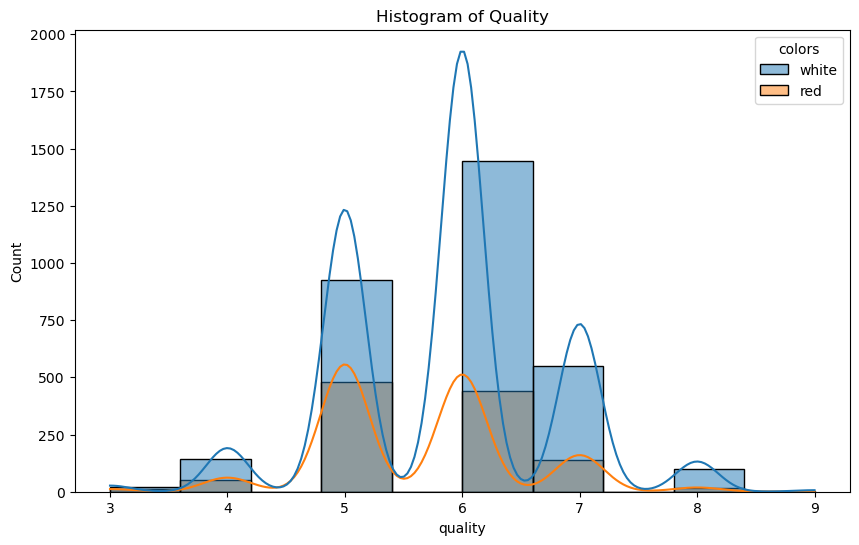

In [68]:
# YOUR CODE HERE
# histogram of quality
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_df, x='quality', hue='colors', bins=10, kde=True)
plt.title('Histogram of Quality')
plt.show()

* Chất lượng của rượu vang trắng tập trung chủ yếu ở mức 5 và 6, với một số lượng đáng kể ở mức 7. Điều này cho thấy đa số rượu vang trắng có chất lượng trung bình khá.
* Rượu vang đỏ có phân bố chất lượng rộng hơn, trải dài từ mức 3 đến 8. Tuy nhiên, điểm tập trung chính vẫn là ở mức 5 và 6.

### Task 02: Aanalyzing acidity in red and white wine.

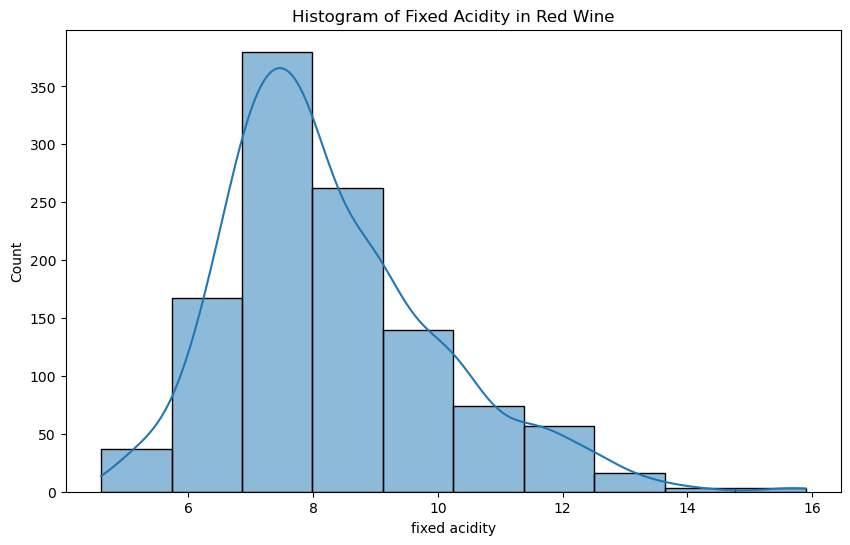

In [69]:
# YOUR CODE HERE
# Analyzing acidity in redv wine.
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_red, x='fixed acidity', bins=10, kde=True)
plt.title('Histogram of Fixed Acidity in Red Wine')
plt.show()


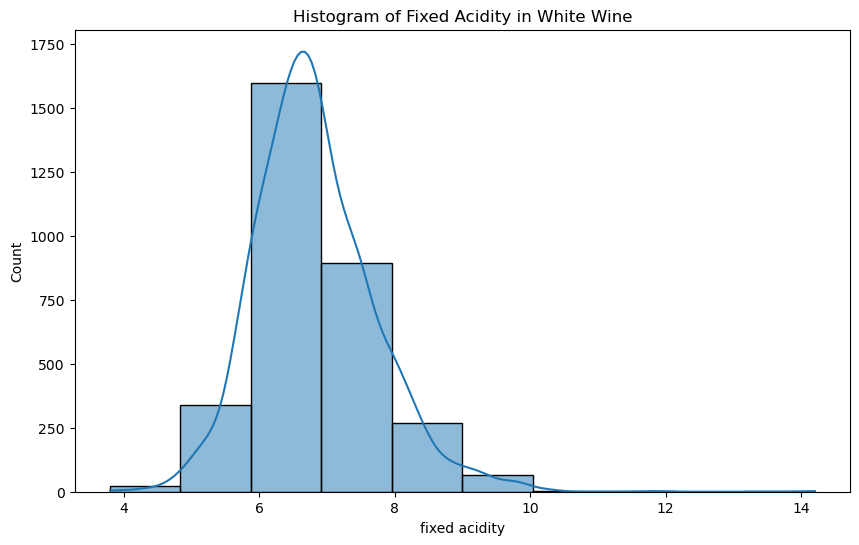

In [70]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_white, x='fixed acidity', bins=10, kde=True)
plt.title('Histogram of Fixed Acidity in White Wine')
plt.show()

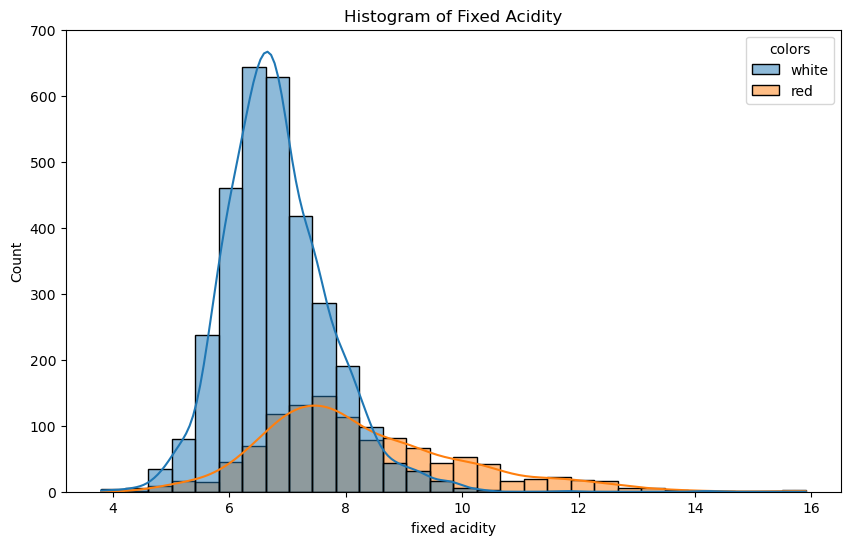

In [71]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_df, x='fixed acidity', hue='colors', bins=30, kde=True)
plt.title('Histogram of Fixed Acidity')
plt.show()

* Rượu vang trắng có độ chua trung bình thấp hơn so với rượu vang đỏ. 
* Phân bố: Độ chua của rượu vang trắng có phân bố tập trung hơn (hình chuông), trong khi rượu vang đỏ có sự đa dạng hơn về mức độ chua. Điều này cho thấy có nhiều yếu tố ảnh hưởng đến độ chua của rượu vang đỏ hơn.

### Task 03: Analyzing sulfur dioxide for each type of wines. Try to focus on the ratio of free and total sulfur.

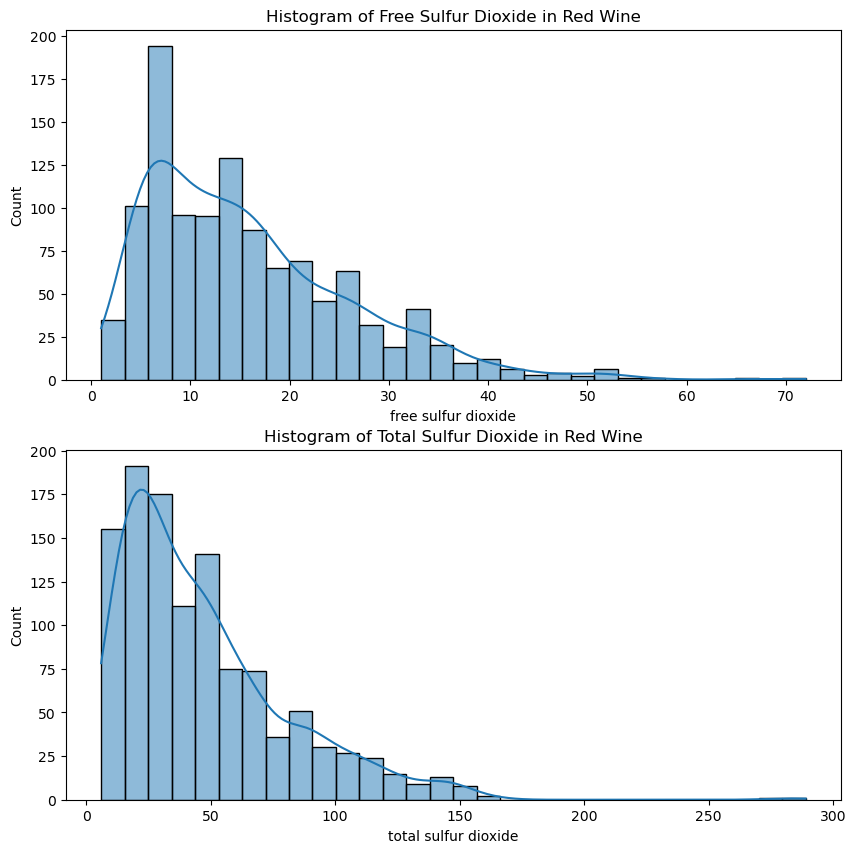

In [72]:
# YOUR CODE HERE
# Analyzing sulfur dioxide for each type of wines. Try to focus on the ratio of free and total sulfur.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(data=raw_red, x='free sulfur dioxide', bins=30, kde=True, ax=ax1)
ax1.set_title('Histogram of Free Sulfur Dioxide in Red Wine')

sns.histplot(data=raw_red, x='total sulfur dioxide', bins=30, kde=True, ax=ax2)
ax2.set_title('Histogram of Total Sulfur Dioxide in Red Wine')

plt.show()


Đối với rượu vang đỏ:
* Free sulfur dioxide: phân bố lệch phải, không có xu hướng rõ ràng, tập trung chủ yếu ở mức thấp (dưới 30 ppm). Điều này cho thấy đa số các mẫu rượu vang đỏ có hàm lượng sulfur dioxide tự do tương đối thấp.
* Total sulfur dioxide: cũng có phân bố lệch phải nhưng với khoảng giá trị rộng hơn. Điều này cho thấy hàm lượng sulfur dioxide tổng trong rượu vang đỏ có sự biến động lớn hơn.

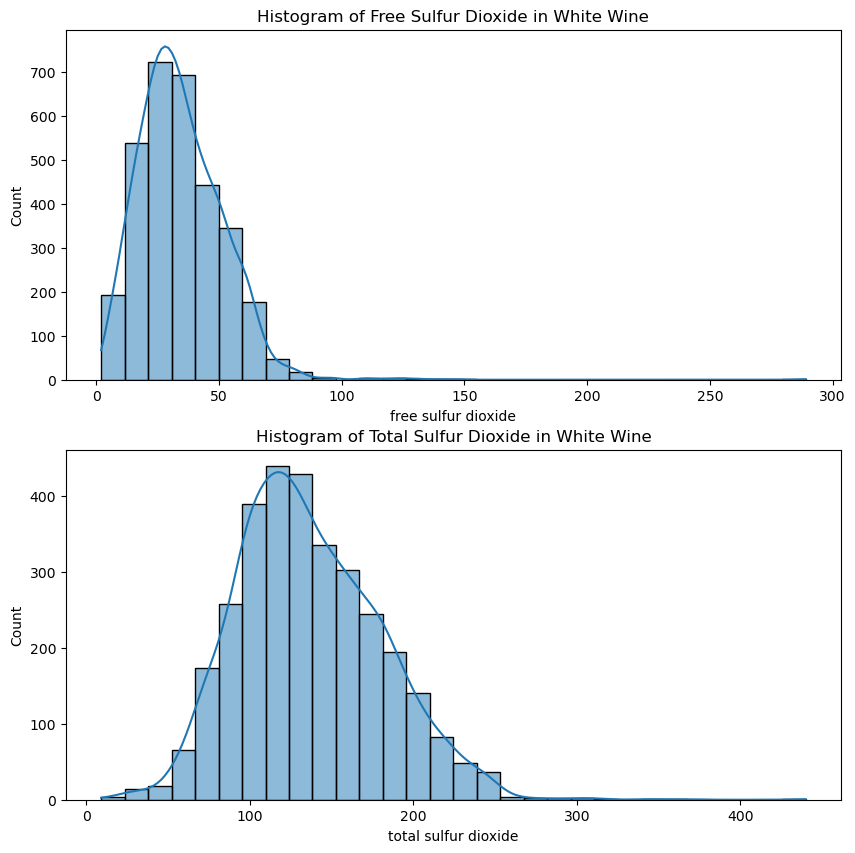

In [73]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(data=raw_white, x='free sulfur dioxide', bins=30, kde=True, ax=ax1)
ax1.set_title('Histogram of Free Sulfur Dioxide in White Wine')

sns.histplot(data=raw_white, x='total sulfur dioxide', bins=30, kde=True, ax=ax2)
ax2.set_title('Histogram of Total Sulfur Dioxide in White Wine')

plt.show()


Đối với rượu vang trắng:
* Free sulfur dioxide: phân bố lệch phải, tập trung chủ yếu ở mức trung bình (dưới 100 ppm). Điều này cho thấy đa số các mẫu rượu vang trắng có hàm lượng sulfur dioxide tự do cao hơn rượu vang đỏ.
* Total sulfur dioxide: phân bố chuông lệch phải nhẹ với khoảng giá trị rộng hơn (khoảng 50 - 250 ppm). Điều này cho thấy hàm lượng sulfur dioxide tổng trong rượu vang trắng có sự biến động lớn hơn.

<Figure size 1000x600 with 0 Axes>

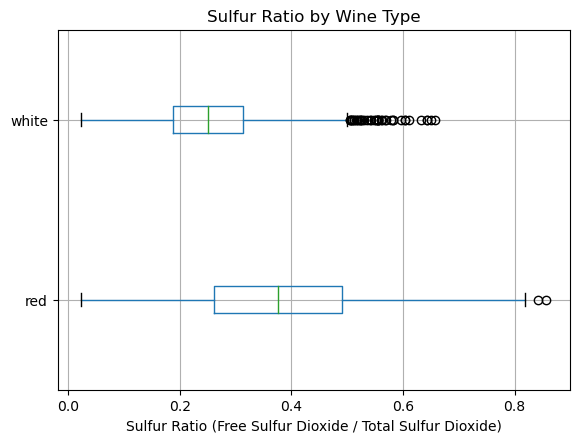

In [74]:
# YOUR CODE HERE
df = raw_df.copy()
df['sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
sulfur_stats = df.groupby('colors')['sulfur_ratio'].describe()

plt.figure(figsize=(10, 6))
df.boxplot(column='sulfur_ratio', by='colors', vert=False)
plt.title('Sulfur Ratio by Wine Type')
plt.suptitle('')  # To remove the extra title added by boxplot
plt.xlabel('Sulfur Ratio (Free Sulfur Dioxide / Total Sulfur Dioxide)')
plt.show()

* Rượu vang trắng có xu hướng có tỷ lệ sulfur dioxide tự do/tổng thấp hơn rượu vang đỏ, đồng thời tồn tại nhiều outliers.
* Rượu vang đỏ có sự phân bố tỉ lệ SO2 lớn hơn nhiều so với rượu vang trắng.

### Task 04: What about the residual sugar? How does it affect wine quality?

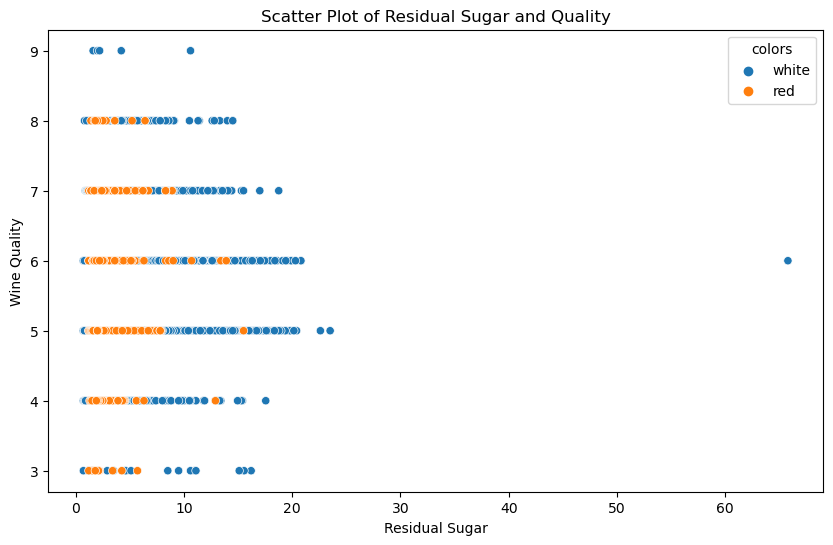

In [75]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='residual sugar', y='quality', hue='colors')
plt.title('Scatter Plot of Residual Sugar and Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Wine Quality')
plt.show()


* Không có mối liên hệ rõ ràng và tuyến tính giữa lượng đường dư và chất lượng rượu => lượng đường dư không phải là yếu tố quyết định duy nhất ảnh hưởng đến chất lượng của một chai rượu.
* Cả rượu vang đỏ và trắng đều có phân bố chất lượng tương đối đồng đều, tập trung chủ yếu ở mức 5 và 6. 
* Cả hai loại rượu đều có một số mẫu có lượng đường dư cao, tuy nhiên, rượu vang trắng có xu hướng có lượng đường dư cao hơn một chút so với rượu vang đỏ.

### Task 05: Alcohol plays a vital role in wine production. How does it affect wine quality?

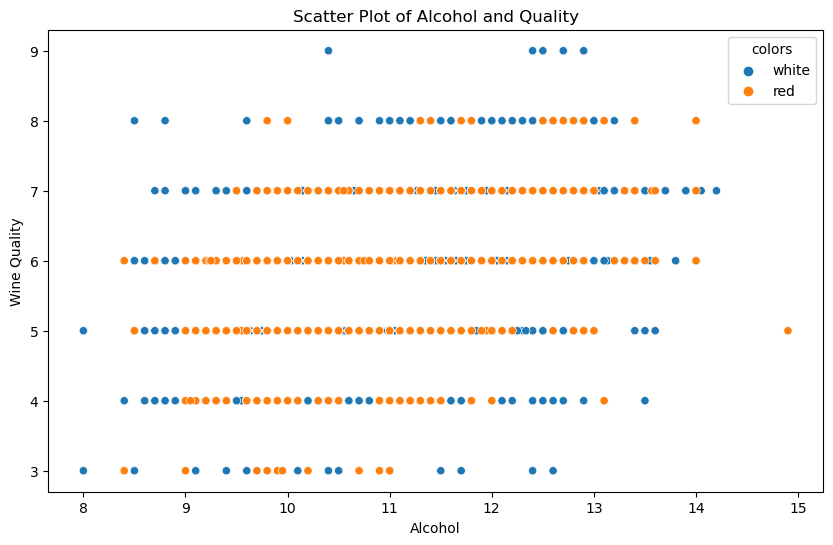

In [76]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='alcohol', y='quality', hue='colors')
plt.title('Scatter Plot of Alcohol and Quality')
plt.xlabel('Alcohol')
plt.ylabel('Wine Quality')
plt.show()

* Nồng độ cồn cao, chất lượng rượu có xu hướng cao hơn. 
* Tuy nhiên, mối quan hệ này không hoàn toàn tuyến tính: Có nghĩa là, không phải lúc nào nồng độ cồn cao cũng đồng nghĩa với chất lượng rượu tốt nhất.

### Task 06: For each type of wine, how is density distributed? Is it importance to wine quality?

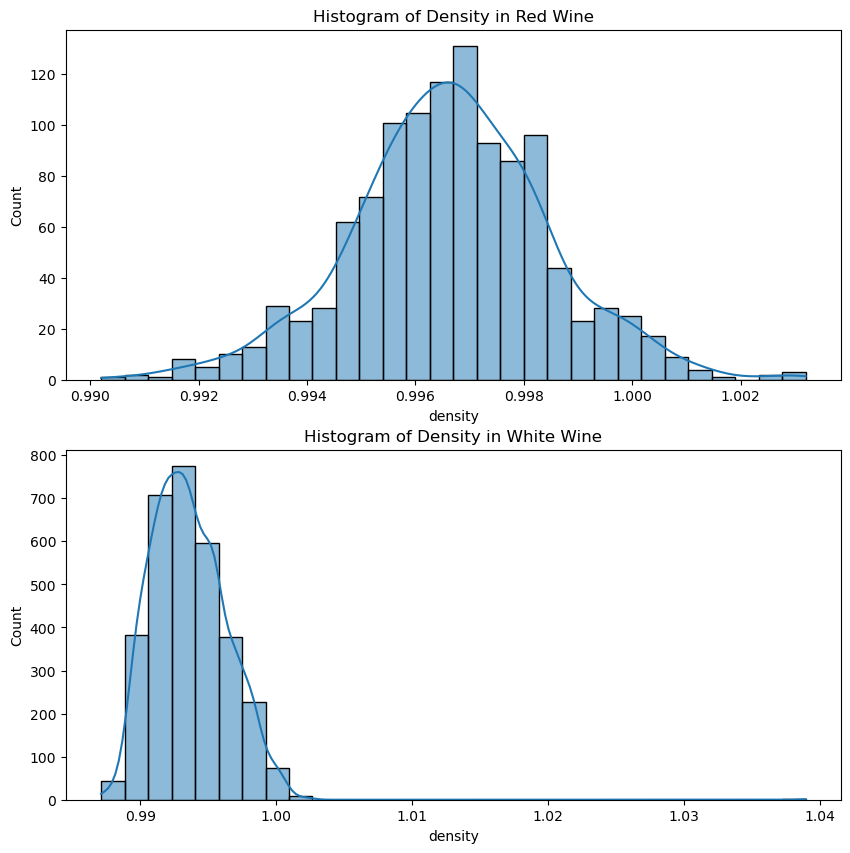

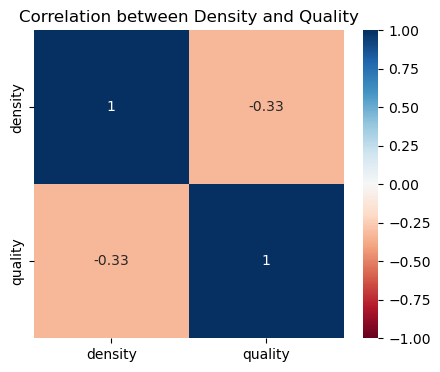

In [77]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(data=raw_red, x='density', bins=30, kde=True, ax=ax1)
ax1.set_title('Histogram of Density in Red Wine')

sns.histplot(data=raw_white, x='density', bins=30, kde=True, ax=ax2)
ax2.set_title('Histogram of Density in White Wine')

plt.show()

correlation = raw_df[['density', 'quality']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between Density and Quality')
plt.show()

Sự phân bố Density của các loại rượu:
* Rượu vang đỏ: tập trung chủ yếu trong khoảng 0.994 đến 0.998, với phân bố gần như hình chuông => density của rượu vang đỏ tương đối đồng đều.
* Rượu vang trắng: tập trung chủ yếu trong khoảng 0.99 đến 1.00, với phân bố lệch phải => density của rượu vang trắng có sự phân tán lớn hơn, với một số mẫu có giá trị cao hơn.

Từ biểu đồ ma trận tương quan, ta thấy có một mối quan hệ âm yếu giữa Density và chất lượng rượu với hệ số tương quan là -0.31 => Density của rượu tăng lên, chất lượng có xu hướng giảm đi và ngược lại. Tuy nhiên mối quan hệ này không mạnh, cho thấy chất lượng rượu cũng bị ảnh hưởng bởi các yếu tố khác ngoài Density

### Task 07: How are Chloride characteristics distributed in these two types of wines? 

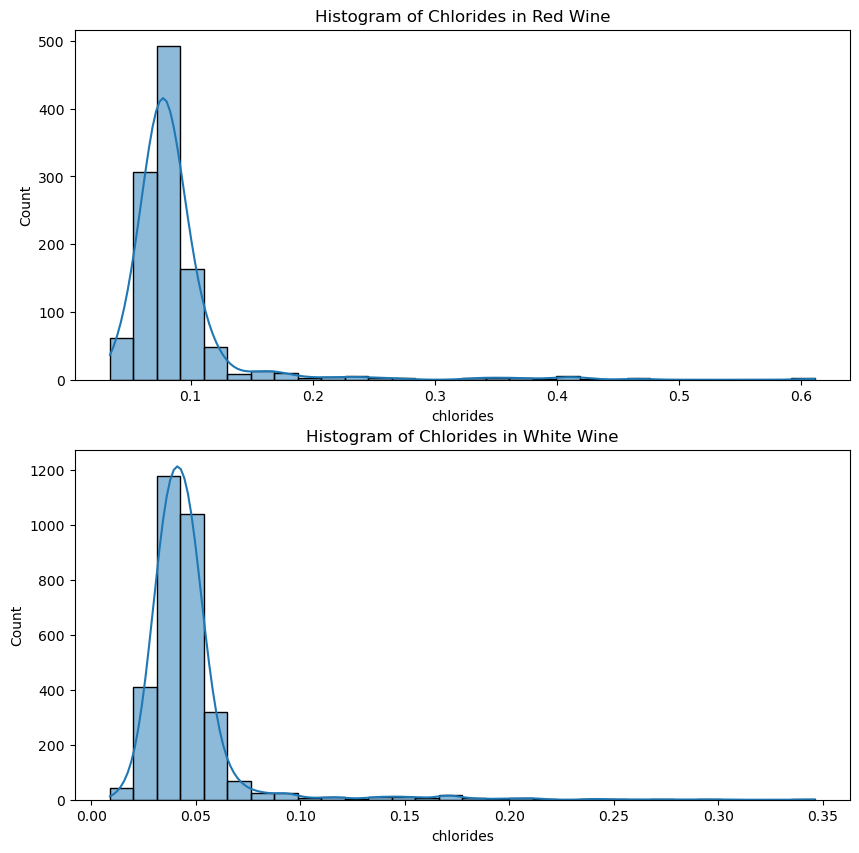

In [78]:
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(data=raw_red, x='chlorides', bins=30, kde=True, ax=ax1)
ax1.set_title('Histogram of Chlorides in Red Wine')

sns.histplot(data=raw_white, x='chlorides', bins=30, kde=True, ax=ax2)
ax2.set_title('Histogram of Chlorides in White Wine')

plt.show()

* Rượu vang đỏ: Hàm lượng clorua tập trung chủ yếu trong khoảng 0.05 đến 0.15 g/L, với phân bố tương đối đồng đều.
* Rượu vang trắng: Hàm lượng clorua cũng tập trung chủ yếu trong khoảng 0.05 đến 0.15 g/L, tuy nhiên độ phân tán của dữ liệu rộng hơn so với rượu vang đỏ, có nghĩa là có nhiều mẫu rượu vang trắng có hàm lượng clorua cao hơn.

=> Cả hai loại rượu vang đều có hàm lượng clorua tương đối thấp, và phần lớn các mẫu rượu đều nằm trong khoảng giá trị tương tự nhau.

## Analyze the correlation between two or more variables

### Task 08: Correlation matrix analysis

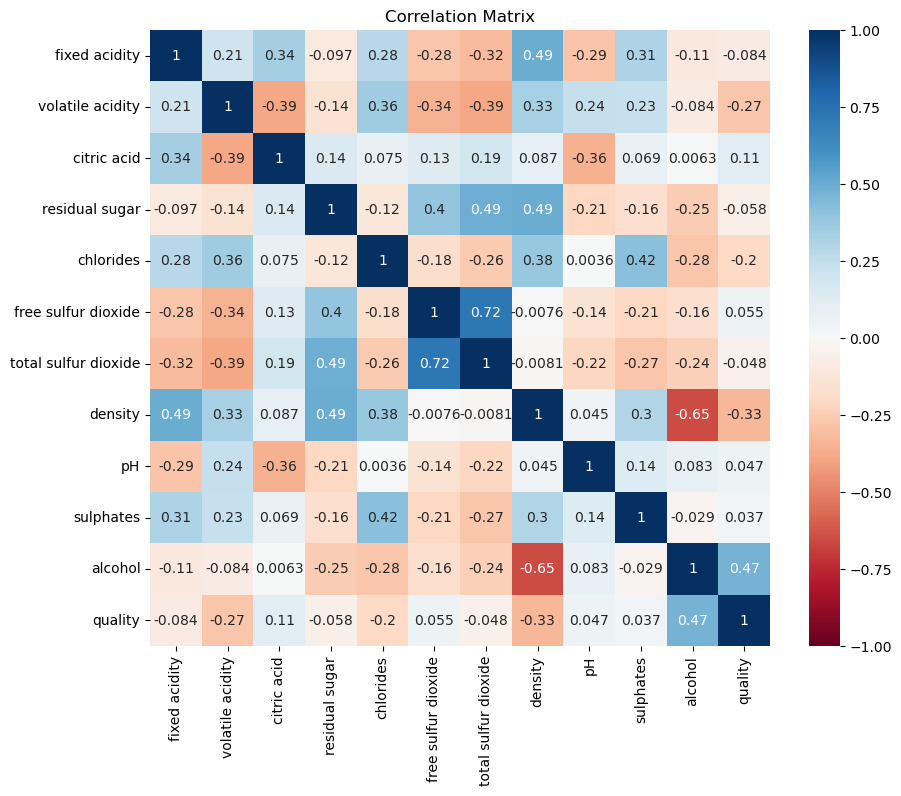

In [79]:
# YOUR CODE HERE
correlations = raw_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Tương quan dương mạnh:** thuộc tính này tăng thì thuộc tính kia cũng tăng theo
* mật độ và fixed acid
* mật độ và residual sugar
* residual và các hợp chất lưu huỳnh (free sulfur dioxide, total sulfur dioxide)

**Tương quan âm mạnh:** thuộc tính này tăng thì thuộc tính kia có xu hướng giảm
* Density và alcohol: Có mối quan hệ âm mạnh, cho thấy khi mật độ tăng thì hàm lượng alcohol có xu hướng giảm.

Xem xét ma trận tương quan, ta nhận thấy đa số các thuộc tính đều có ảnh hưởng lẫn nhau ở mức trung bình (với hệ số tương quan khoảng 0.1 đến 0.4). Các yếu tố có thể ảnh hưởng đến chất lượng rượu có thể kể đến là:
* alcohol: 0.47
* density: -0.33
* volatide acidity: -0.27
* chlorides: -0.2

### Analysis of the influence of variables on wine quality

#### Task 09: Investigating the relationship between `Density` and `Quality`

         density  quality
density  1.00000 -0.33045
quality -0.33045  1.00000


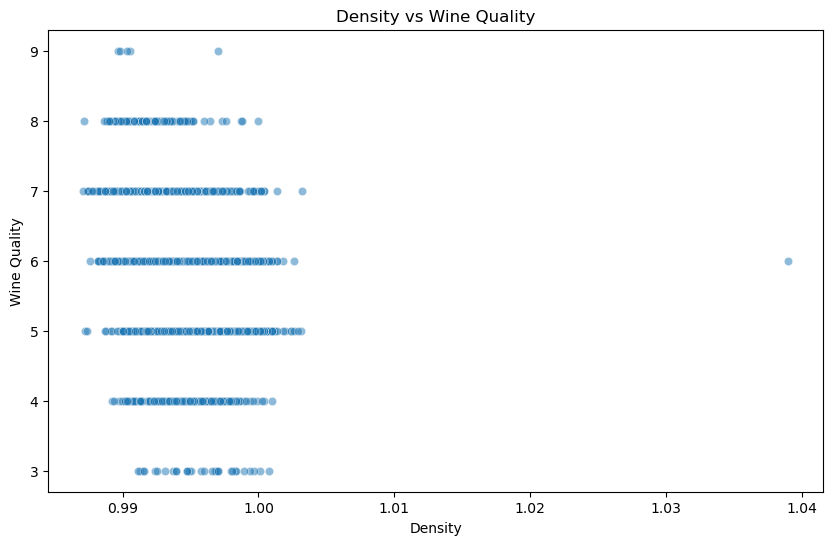

In [80]:
# YOUR CODE HERE
correlation = raw_df[['density', 'quality']].corr()
print(correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='quality', data=raw_df, alpha=0.5)
plt.title('Density vs Wine Quality')
plt.xlabel('Density')
plt.ylabel('Wine Quality')
plt.show()


Mật độ của rượu phụ thuộc vào nhiều yếu tố như hàm lượng đường, cồn, axit và các chất hòa tan khác. Khi mật độ tăng lên, thường đồng nghĩa với việc hàm lượng đường hoặc các chất hòa tan khác tăng lên, điều này có thể ảnh hưởng đến cân bằng hương vị và làm giảm chất lượng rượu. 

#### Task 10: Investigating the relationship between `Alcohol` and `Quality`

          alcohol   quality
alcohol  1.000000  0.471909
quality  0.471909  1.000000


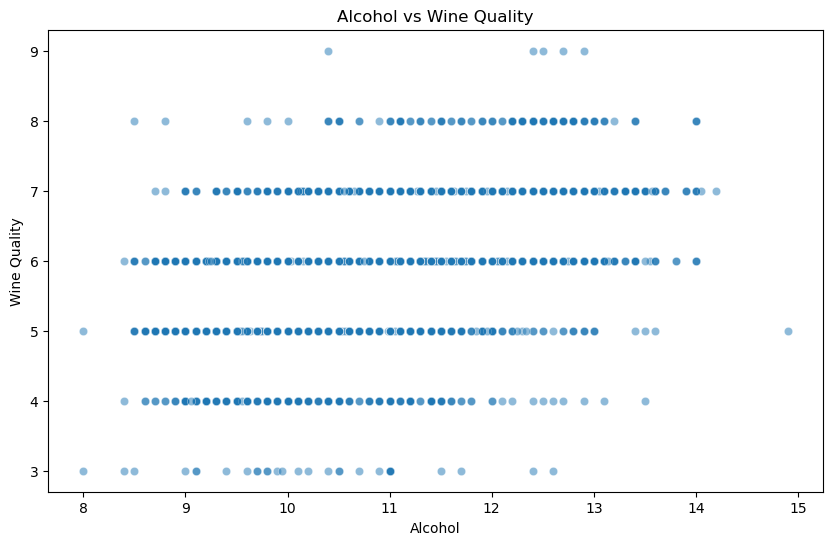

In [81]:
# YOUR CODE HERE
correlation = raw_df[['alcohol', 'quality']].corr()
print(correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=raw_df, alpha=0.5)
plt.title('Alcohol vs Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Wine Quality')
plt.show()

* Nồng độ cồn cao, chất lượng rượu có xu hướng cao hơn. 
* Tuy nhiên, mối quan hệ này không hoàn toàn tuyến tính: Có nghĩa là, không phải lúc nào nồng độ cồn cao cũng đồng nghĩa với chất lượng rượu tốt nhất.

#### Task 11: Investigating the relationship between `Chlorides` and `Quality`

           chlorides   quality
chlorides   1.000000 -0.201755
quality    -0.201755  1.000000


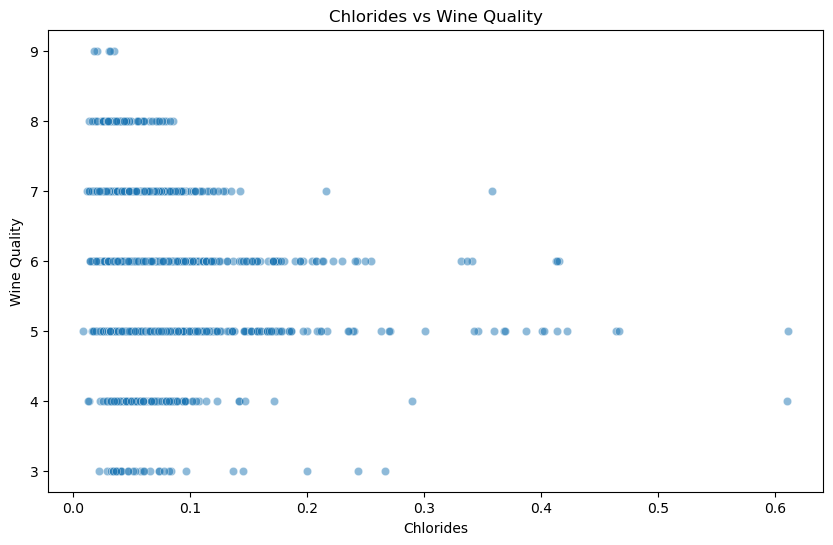

In [82]:
# YOUR CODE HERE
correlation = raw_df[['chlorides', 'quality']].corr()
print(correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chlorides', y='quality', data=raw_df, alpha=0.5)
plt.title('Chlorides vs Wine Quality')
plt.xlabel('Chlorides')
plt.ylabel('Wine Quality')
plt.show()

Biểu đồ phân tán và hệ số tương quan -0.2 cho thấy một mối quan hệ âm yếu giữa lượng chloride và chất lượng rượu vang.

=> khi lượng chloride tăng lên, chất lượng rượu có xu hướng giảm đi một chút. Tuy nhiên, mối quan hệ này không mạnh và có rất nhiều ngoại lệ. Có những loại rượu có hàm lượng chloride cao nhưng vẫn được đánh giá cao về chất lượng, và ngược lại.

#### Task 12: Investigating the relationship between `Volatile Acidity` and `Quality`

                  volatile acidity   quality
volatile acidity          1.000000 -0.273879
quality                  -0.273879  1.000000


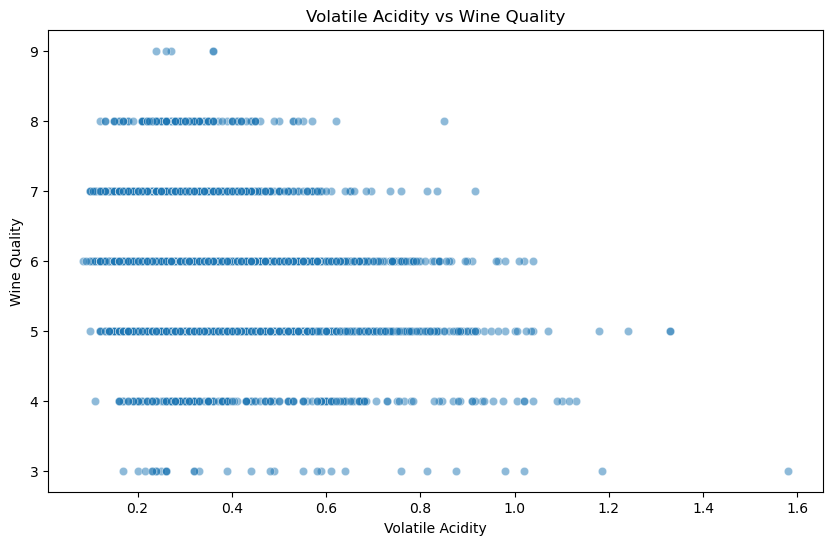

In [83]:
# YOUR CODE HERE
correlation = raw_df[['volatile acidity', 'quality']].corr()
print(correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='quality', data=raw_df, alpha=0.5)
plt.title('Volatile Acidity vs Wine Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Wine Quality')
plt.show()

Biểu đồ phân tán và hệ số tương quan -0.27 cho thấy một mối quan hệ âm giữa Volatide Acidity và chất lượng rượu vang.

=> Rượu vang có độ Volatide Acidity cao thường có chất lượng thấp hơn so với những loại rượu có độ Volatide Acidity thấp. Volatide Acidity cao thường tạo ra vị chua gắt, khó chịu và mùi giấm, ảnh hưởng tiêu cực đến hương vị của rượu.

Tuy nhiên có nhiều ngoại lệ: Có những loại rượu có độ axit dễ bay hơi cao nhưng vẫn được đánh giá cao về chất lượng, và ngược lại.

#### Task 13: Investigation of the relationship between total SO2 and residual sugar after fermentation

                      total sulfur dioxide  residual sugar
total sulfur dioxide              1.000000        0.485631
residual sugar                    0.485631        1.000000


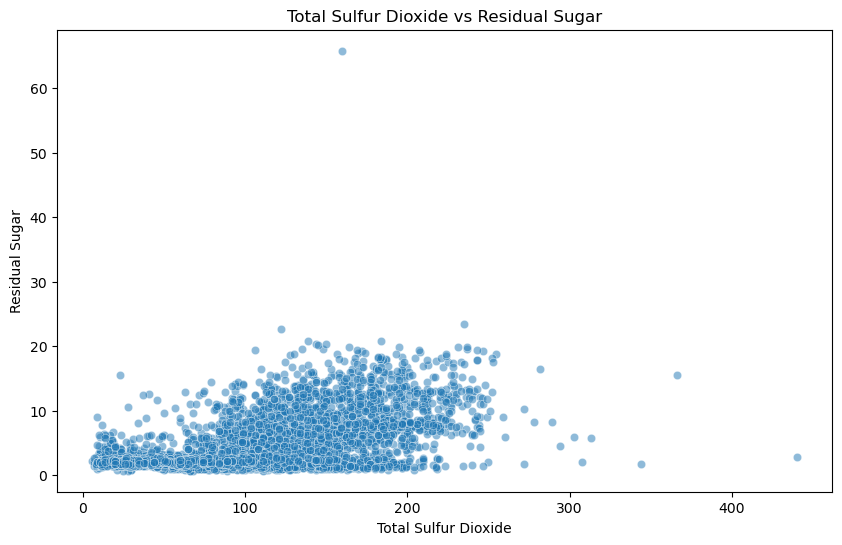

In [84]:
# YOUR CODE HERE
correlation = raw_df[['total sulfur dioxide', 'residual sugar']].corr()
print(correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total sulfur dioxide', y='residual sugar', data=raw_df, alpha=0.5)
plt.title('Total Sulfur Dioxide vs Residual Sugar')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Residual Sugar')
plt.show()

Mối quan hệ dương khá rõ ràng giữa tổng lượng SO2 và Residual sugar trong rượu vang => rượu vang có hàm lượng SO2 cao thường có lượng đường còn lại cao hơn.

Tuy nhiên có nhiều ngoại lệ: Không phải tất cả các loại rượu vang có hàm lượng SO2 cao đều có lượng đường cao, và ngược lại.

#### Task 14: Investigation of the impact of alcohol concentration and sugar content on alcohol density

                 alcohol  residual sugar   density
alcohol         1.000000       -0.251611 -0.650538
residual sugar -0.251611        1.000000  0.492298
density        -0.650538        0.492298  1.000000


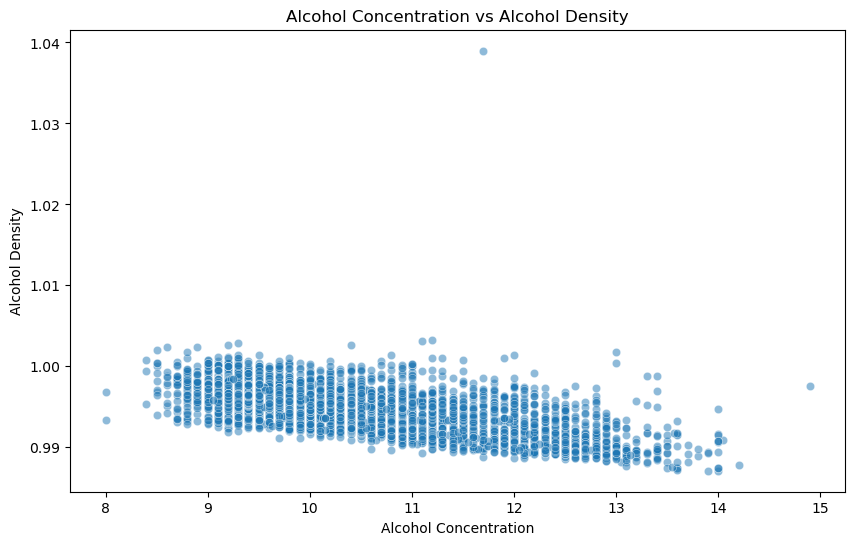

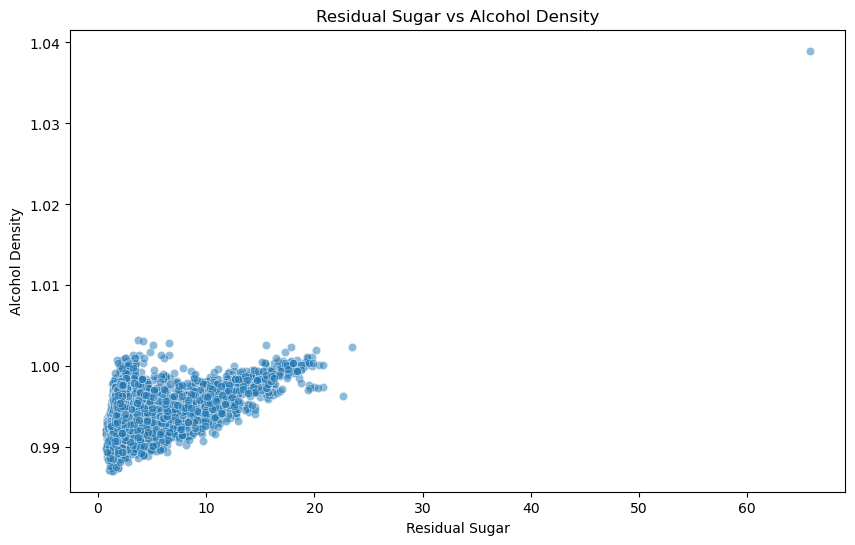

In [85]:
# YOUR CODE HERE
correlation = raw_df[['alcohol', 'residual sugar', 'density']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='density', data=raw_df, alpha=0.5)
plt.title('Alcohol Concentration vs Alcohol Density')
plt.xlabel('Alcohol Concentration')
plt.ylabel('Alcohol Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='density', data=raw_df, alpha=0.5)
plt.title('Residual Sugar vs Alcohol Density')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol Density')
plt.show()

**Acohol vs Density:** mối quan hệ âm mạnh giữa nồng độ cồn và mật độ
* Nồng độ cồn tăng lên thì mật độ có xu hướng giảm đi.
* Mối quan hệ này là tuyến tính: Khi nồng độ cồn tăng lên, mật độ cồn giảm đi một cách đều đặn.
* Có thể có một số ngoại lệ nhỏ do các yếu tố khác như nhiệt độ, áp suất, và các chất hòa tan khác.

**Residual Sugar vs Density:** mối quan hệ âm giữa lượng đường còn lại và mật độ rượu
* Rượu vang có hàm lượng đường còn lại cao hơn thì có mật độ thấp hơn.
* Không hoàn toàn tuyến tính: một số điểm dữ liệu nằm ngoài xu hướng chung, đặc biệt là ở vùng có lượng đường cao. 
* Có một số điểm dữ liệu nằm khá xa so với xu hướng chung, đặc biệt là ở phía trên bên phải. 


### Analysis based on wine color

#### Task 15: Analyze the relationship between color and density of wine

         count      mean       std      min      25%      50%     75%      max
colors                                                                        
red     1139.0  0.996648  0.001835  0.99020  0.99554  0.99666  0.9978  1.00320
white   3189.0  0.993592  0.002821  0.98711  0.99150  0.99331  0.9954  1.03898


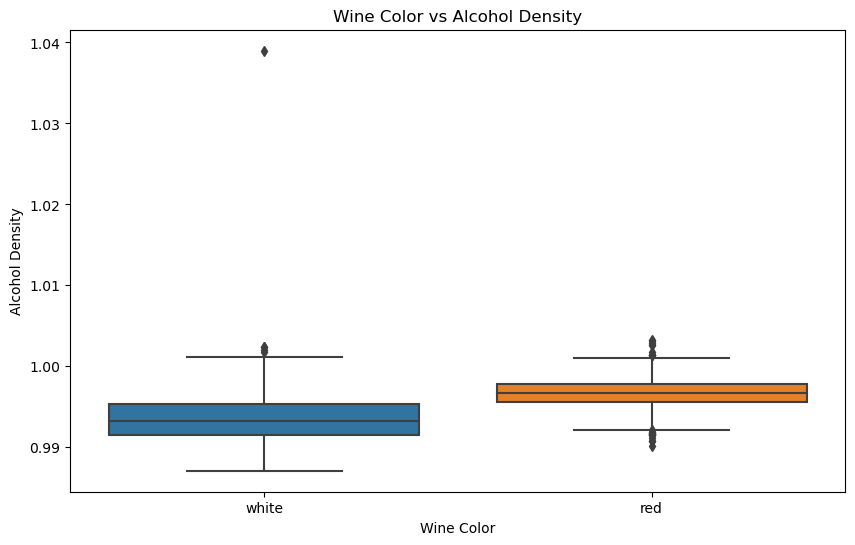

In [86]:
# YOUR CODE HERE
color_density_stats = df.groupby('colors')['density'].describe()
print(color_density_stats)

plt.figure(figsize=(10, 6))
sns.boxplot(x='colors', y='density', data=raw_df)
plt.title('Wine Color vs Alcohol Density')
plt.xlabel('Wine Color')
plt.ylabel('Alcohol Density')
plt.show()


Biểu đồ boxplot cho thấy rượu vang đỏ có mật độ cao hơn so với rượu vang trắng. Điều này có thể giải thích bởi sự khác biệt trong thành phần hóa học của hai loại rượu. Tuy nhiên:
* Có sự phân tán: Mặc dù trung bình rượu vang đỏ có mật độ cao hơn, nhưng vẫn có một số mẫu rượu vang đỏ có mật độ thấp và ngược lại.
* Các yếu tố khác: Ngoài màu sắc, còn nhiều yếu tố khác ảnh hưởng đến mật độ của rượu vang như hàm lượng đường, nồng độ cồn, và các chất hòa tan khác.

#### Task 16: Analyze the relationship between color and residual sugar after fermentation

         count      mean       std  min  25%  50%  75%   max
colors                                                      
red     1139.0  2.493635  1.257423  1.2  1.9  2.2  2.6  15.5
white   3189.0  5.511320  4.660891  0.7  1.6  4.2  8.2  65.8


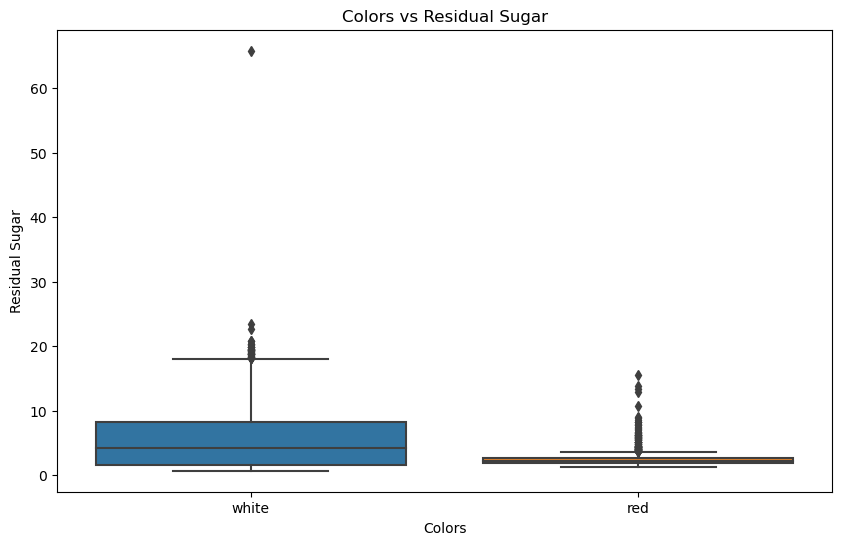

In [87]:
# YOUR CODE HERE
sugar_stats_by_color = df.groupby('colors')['residual sugar'].describe()
print(sugar_stats_by_color)

plt.figure(figsize=(10, 6))
sns.boxplot(x='colors', y='residual sugar', data=df)
plt.title('Colors vs Residual Sugar')
plt.xlabel('Colors')
plt.ylabel('Residual Sugar')
plt.show()

* Rượu vang trắng có Residual sugar trung bình cao hơn đáng kể so với rượu vang đỏ, thể hiện qua giá trị trung bình (mean) và các tứ phân vị (quartiles).
* Sự phân tán của dữ liệu về Residual sugar ở rượu vang trắng lớn hơn rất nhiều so với rượu vang đỏ
* Một số mẫu rượu vang đỏ và trắng có lượng đường còn lại rất cao: Các giá trị ngoại lệ (outliers) ở cả hai nhóm cho thấy sự tồn tại của một số loại rượu vang đặc biệt, có thể là các loại rượu ngọt hoặc rượu có quá trình sản xuất đặc biệt.

#### Task 17: Analyze the relationship between color and total sulfur content in wine

         count        mean        std  min    25%    50%    75%    max
colors                                                                
red     1139.0   47.152766  33.993453  6.0   22.0   38.0   63.0  289.0
white   3189.0  136.419724  43.941114  9.0  105.0  131.0  166.0  440.0


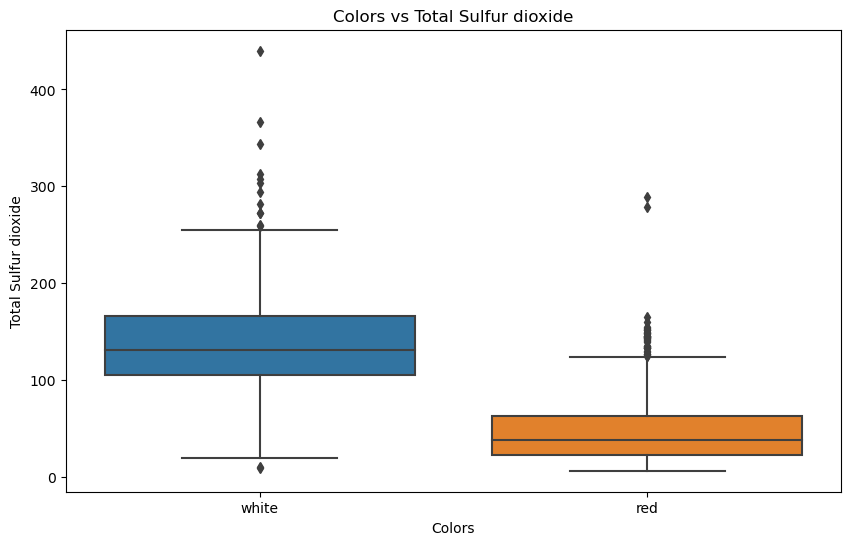

In [88]:
# YOUR CODE HERE
total_sulfur_stats_by_color = df.groupby('colors')['total sulfur dioxide'].describe()
print(total_sulfur_stats_by_color)

plt.figure(figsize=(10, 6))
sns.boxplot(x='colors', y='total sulfur dioxide', data=df)
plt.title('Colors vs Total Sulfur dioxide')
plt.xlabel('Colors')
plt.ylabel('Total Sulfur dioxide')
plt.show()

* Rượu vang trắng có hàm lượng sulfur dioxide trung bình cao hơn đáng kể so với rượu vang đỏ, thể hiện qua giá trị trung bình (mean) và các tứ phân vị (quartiles).
* Sự phân tán của dữ liệu về lượng sulfur dioxide ở rượu vang trắng lớn hơn nhiều so với rượu vang đỏ
* Một số mẫu rượu vang đỏ và trắng có hàm lượng sulfur dioxide rất cao: Các giá trị ngoại lệ (outliers) ở cả hai nhóm cho thấy sự tồn tại của một số loại rượu vang đặc biệt, có thể là các loại rượu được bảo quản bằng phương pháp khác hoặc có quá trình sản xuất đặc biệt.

#### Task 18: Analyze the relationship between color and free sulfur content in wine

         count       mean        std  min   25%   50%   75%    max
colors                                                            
red     1139.0  15.929763  10.392575  1.0   7.0  14.0  21.0   72.0
white   3189.0  34.524459  17.408865  2.0  22.0  32.0  45.0  289.0


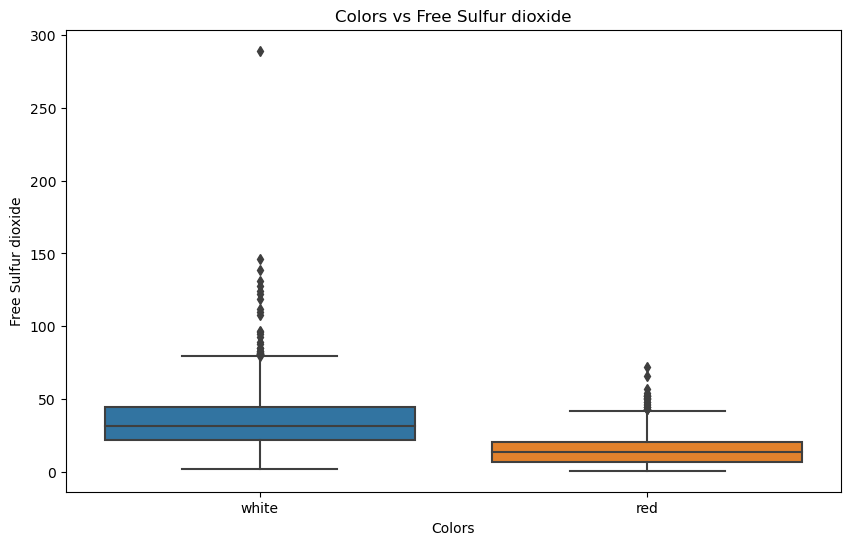

In [89]:
# YOUR CODE HERE
free_sulfur_stats_by_color = df.groupby('colors')['free sulfur dioxide'].describe()
print(free_sulfur_stats_by_color)

plt.figure(figsize=(10, 6))
sns.boxplot(x='colors', y='free sulfur dioxide', data=df)
plt.title('Colors vs Free Sulfur dioxide')
plt.xlabel('Colors')
plt.ylabel('Free Sulfur dioxide')
plt.show()

* Rượu vang trắng có hàm lượng sulfur dioxide tự do cao hơn so với rượu vang đỏ, thể hiện qua giá trị trung bình (mean) và các tứ phân vị (quartiles).
* Sự phân tán của dữ liệu về lượng sulfur dioxide ở rượu vang trắng lớn hơn rượu vang đỏ
* Một số mẫu rượu vang đỏ và trắng có hàm lượng sulfur dioxide rất cao: Các giá trị ngoại lệ (outliers) ở cả hai nhóm cho thấy sự tồn tại của một số loại rượu vang đặc biệt, có thể là các loại rượu được bảo quản bằng phương pháp khác hoặc có quá trình sản xuất đặc biệt.

#### Task 19: Analyze the relationship between color and acidity of wine

Fixed Acidity Stats by Color
         count       mean        std  min   25%   50%   75%    max
colors                                                            
red     1139.0  15.929763  10.392575  1.0   7.0  14.0  21.0   72.0
white   3189.0  34.524459  17.408865  2.0  22.0  32.0  45.0  289.0
Volative Acidity Stats by Color
         count      mean       std    min   25%   50%    75%   max
colors                                                            
red     1139.0  0.531172  0.188279  0.160  0.39  0.52  0.645  1.58
white   3189.0  0.281706  0.106430  0.085  0.21  0.26  0.330  1.10


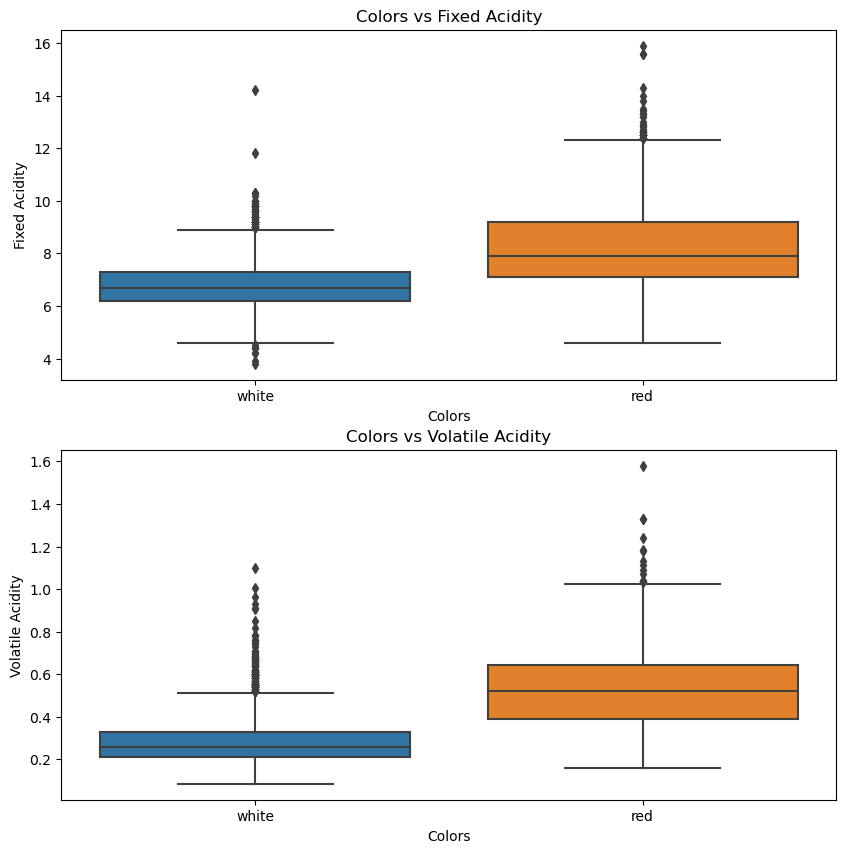

In [90]:
# YOUR CODE HERE

acidity_stats_by_color = df.groupby('colors')['fixed acidity'].describe()
print("Fixed Acidity Stats by Color")
print(free_sulfur_stats_by_color)

v_acidity_stats_by_color = df.groupby('colors')['volatile acidity'].describe()
print("Volative Acidity Stats by Color")
print(v_acidity_stats_by_color)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.boxplot(x='colors', y='fixed acidity', data=df, ax=ax1)
ax1.set_title('Colors vs Fixed Acidity')
ax1.set_xlabel('Colors')
ax1.set_ylabel('Fixed Acidity')

sns.boxplot(x='colors', y='volatile acidity', data=df, ax=ax2)
ax2.set_title('Colors vs Volatile Acidity')
ax2.set_xlabel('Colors')
ax2.set_ylabel('Volatile Acidity')

plt.show()

**Fixed Acidity:**
* Rượu vang đỏ có độ axit cố định trung bình cao hơn đáng kể so với rượu vang trắng.
* Sự phân tán của dữ liệu về độ axit cố định ở rượu vang đỏ lớn hơn so với rượu vang trắng.

**Volatide Acidity:**
* Rượu vang đỏ có độ axit dễ bay hơi trung bình cao hơn đáng kể so với rượu vang trắng.
* Sự phân tán của dữ liệu về độ axit dễ bay hơi ở rượu vang đỏ lớn hơn so với rượu vang trắng.

**Kết luận:**
* Cả độ axit cố định và độ axit dễ bay hơi đều có sự khác biệt rõ rệt giữa rượu vang đỏ và trắng.
* Rượu vang đỏ thường có độ axit cố định và độ axit dễ bay hơi cao hơn so với rượu vang trắng.
* Sự phân tán của dữ liệu về độ axit ở rượu vang đỏ lớn hơn, cho thấy sự đa dạng về độ axit trong các mẫu rượu vang đỏ.

Tồn tại các outliers ở cả hai nhóm cho thấy sự tồn tại của một số loại rượu vang đặc biệt, có thể là các loại rượu được bảo quản bằng phương pháp khác hoặc có quá trình sản xuất đặc biệt.

### Correlation analysis between variables based on color

#### Task 20: Investigate the correlation between density and wine quality based on color

Correlation between Density and Quality in White Wine
          density   quality
density  1.000000 -0.343549
quality -0.343549  1.000000
correlation between Density and Quality in Red Wine
          density   quality
density  1.000000 -0.199894
quality -0.199894  1.000000


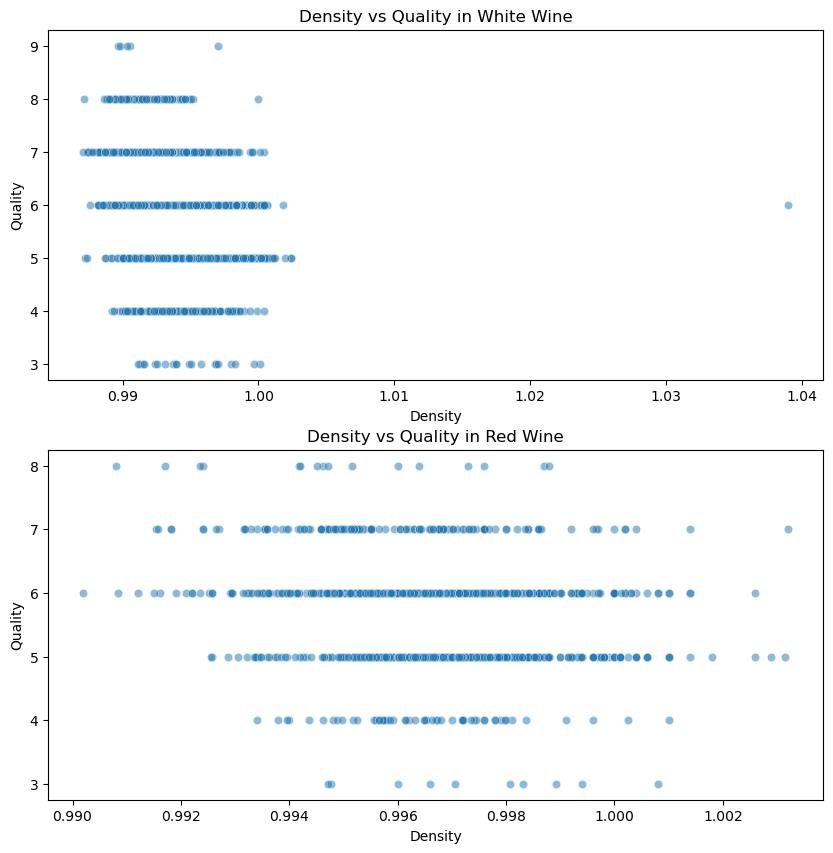

In [91]:
# YOUR CODE HERE
corr_white = raw_white[['density', 'quality']].corr()
print("Correlation between Density and Quality in White Wine")
print(corr_white)

corr_red = raw_red[['density', 'quality']].corr()
print("correlation between Density and Quality in Red Wine")
print(corr_red)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.scatterplot(data=raw_white, x='density', y='quality', alpha=0.5, ax=ax1)
ax1.set_title('Density vs Quality in White Wine')
ax1.set_xlabel('Density')
ax1.set_ylabel('Quality')

sns.scatterplot(data=raw_red, x='density', y='quality', alpha=0.5, ax=ax2)
ax2.set_title('Density vs Quality in Red Wine')
ax2.set_xlabel('Density')
ax2.set_ylabel('Quality')

plt.show()

* Mối quan hệ âm: Cả rượu vang đỏ và trắng đều cho thấy mối quan hệ âm giữa mật độ và chất lượng. Tuy nhiên mật độ ở rượu vang trắng ảnh hưởng nhiều hơn đến chất lượng rượu so với rượu vang đỏ do hệ số tương quan cao hơn và sự tuyến tính rõ ràng hơn.
* Mối quan hệ này không hoàn toàn tuyến tính, có nghĩa là không phải lúc nào nồng độ cồn cao hơn cũng đồng nghĩa với chất lượng cao hơn. Có thể có ngưỡng tối ưu mà khi vượt qua, chất lượng rượu có thể giảm.

#### Task 21: Investigate the correlation between alcohol concentration and wine quality based on color

Correlation between Alcohol and Quality in White Wine
          alcohol   quality
alcohol  1.000000  0.461514
quality  0.461514  1.000000
correlation between Alcohol and Quality in Red Wine
          alcohol   quality
alcohol  1.000000  0.486878
quality  0.486878  1.000000


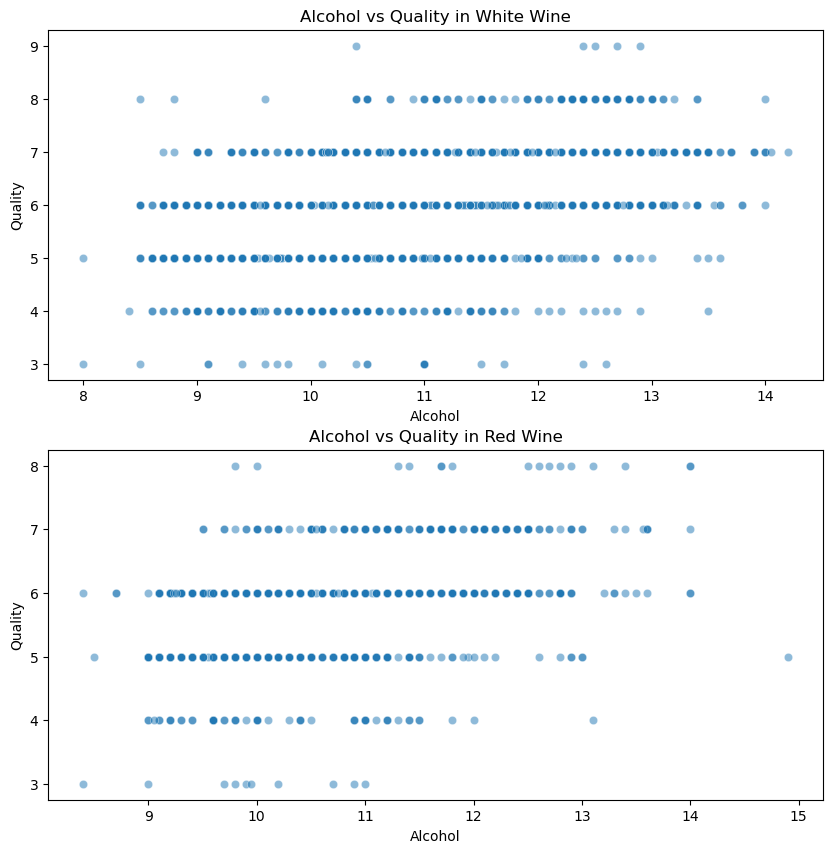

In [92]:
# YOUR CODE HERE
corr_white = raw_white[['alcohol', 'quality']].corr()
print("Correlation between Alcohol and Quality in White Wine")
print(corr_white)

corr_red = raw_red[['alcohol', 'quality']].corr()
print("correlation between Alcohol and Quality in Red Wine")
print(corr_red)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.scatterplot(data=raw_white, x='alcohol', y='quality', alpha=0.5, ax=ax1)
ax1.set_title('Alcohol vs Quality in White Wine')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Quality')

sns.scatterplot(data=raw_red, x='alcohol', y='quality', alpha=0.5, ax=ax2)
ax2.set_title('Alcohol vs Quality in Red Wine')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Quality')

plt.show()

* Mối quan hệ dương vừa phải: Cả rượu vang đỏ và trắng đều cho thấy một mối quan hệ dương giữa nồng độ cồn và chất lượng => rượu vang có nồng độ cồn cao hơn thường có chất lượng được đánh giá cao hơn.
* Mối quan hệ này không hoàn toàn tuyến tính, có nghĩa là không phải lúc nào nồng độ cồn cao hơn cũng đồng nghĩa với chất lượng cao hơn. Có thể có ngưỡng tối ưu mà khi vượt qua, chất lượng rượu có thể giảm.
* Rượu vang đỏ có hệ số tương quan cao hơn một chút so với rượu vang trắng, cho thấy mối quan hệ giữa nồng độ cồn và chất lượng có thể mạnh hơn ở rượu vang đỏ.

#### Task 22: Investigate the correlation between salt content and wine quality based on color

In [93]:
# YOUR CODE HERE


Hmm. seem like there's no salt content in this dataset

#### Task 23: Investigate the correlation between acidity and wine quality based on color

Correlation between Acidity and Quality in White Wine
               fixed acidity   quality
fixed acidity       1.000000 -0.128575
quality            -0.128575  1.000000
Correlation between Acidity and Quality in Red Wine
               fixed acidity   quality
fixed acidity       1.000000  0.110252
quality             0.110252  1.000000


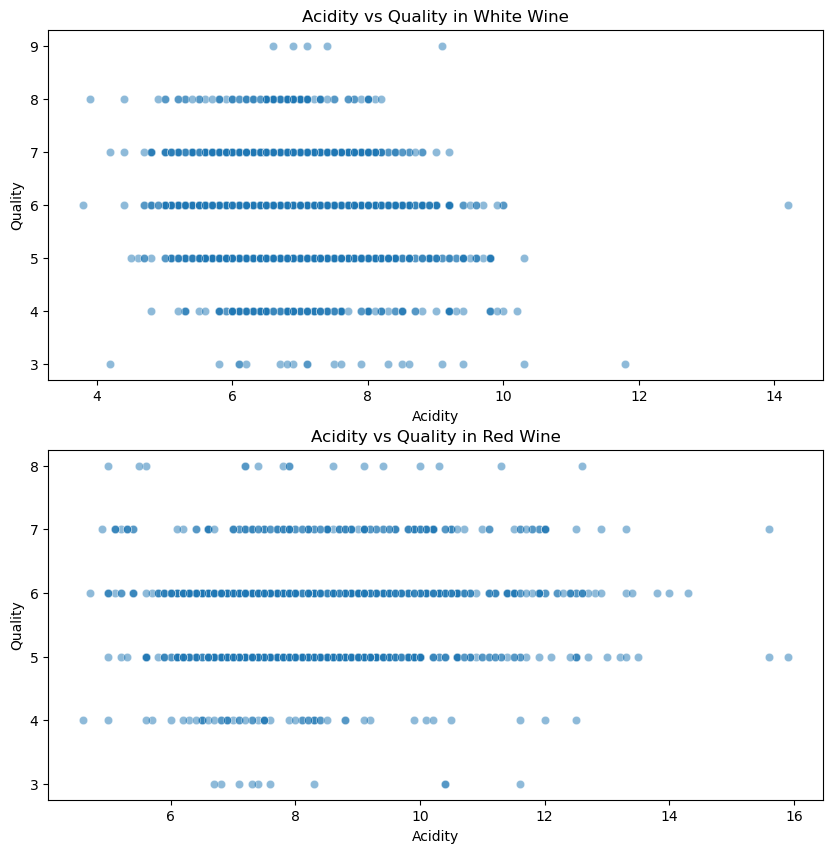

In [94]:
# YOUR CODE HERE
corr_white = raw_white[['fixed acidity', 'quality']].corr()
print("Correlation between Acidity and Quality in White Wine")
print(corr_white)

corr_red = raw_red[['fixed acidity', 'quality']].corr()
print("Correlation between Acidity and Quality in Red Wine")
print(corr_red)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

sns.scatterplot(data=raw_white, x='fixed acidity', y='quality', alpha=0.5, ax=ax1)
ax1.set_title('Acidity vs Quality in White Wine')
ax1.set_xlabel('Acidity')
ax1.set_ylabel('Quality')

sns.scatterplot(data=raw_red, x='fixed acidity', y='quality', alpha=0.5, ax=ax2)
ax2.set_title('Acidity vs Quality in Red Wine')
ax2.set_xlabel('Acidity')
ax2.set_ylabel('Quality')

plt.show()

* Mối quan hệ yếu và không rõ ràng: Cả rượu vang đỏ và trắng đều cho thấy mối quan hệ giữa độ axit và chất lượng rất yếu và không rõ ràng. Hệ số tương quan gần bằng 0, cho thấy sự thay đổi của độ axit không ảnh hưởng đáng kể đến chất lượng rượu.
* Mặc dù cả hai loại rượu đều cho thấy mối quan hệ yếu, nhưng chiều hướng có phần khác nhau. Rượu vang trắng có xu hướng cho thấy mối quan hệ âm nhẹ, tức là khi độ axit tăng thì chất lượng có xu hướng giảm nhẹ. Trong khi đó, rượu vang đỏ lại cho thấy mối quan hệ dương nhẹ, nghĩa là khi độ axit tăng thì chất lượng có xu hướng tăng nhẹ. Tuy nhiên, như đã nói, cả hai mối quan hệ này đều rất yếu và không đáng kể.

### Multi-attributes analysis

#### Task 24: Chlorides and Sulphates on wine quality

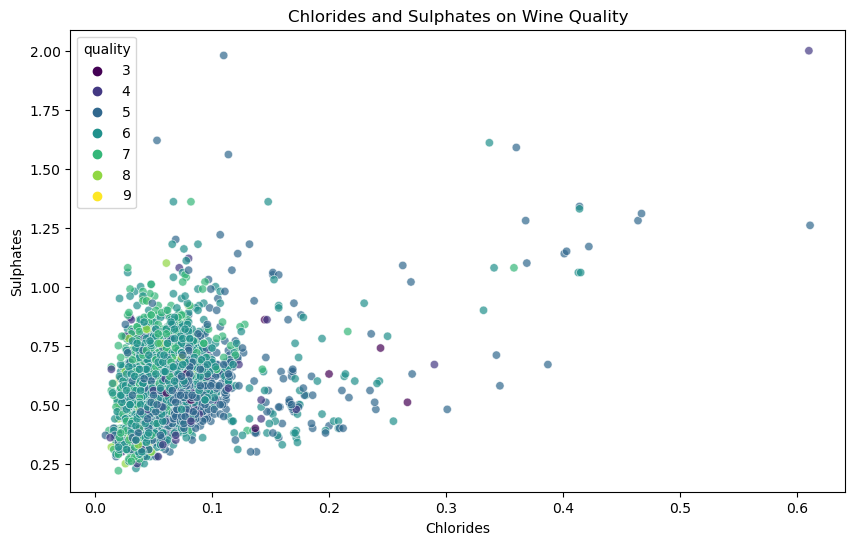

Correlations between Chlorides, Sulphates and Quality:
           chlorides  sulphates   quality
chlorides   1.000000   0.415120 -0.201755
sulphates   0.415120   1.000000  0.037415
quality    -0.201755   0.037415  1.000000
Regression Coefficients: Chlorides = -6.0332, Sulphates = 0.8674
Intercept: 5.6615


In [95]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='chlorides', y='sulphates', hue='quality', palette='viridis', alpha=0.7)
plt.title('Chlorides and Sulphates on Wine Quality')
plt.xlabel('Chlorides')
plt.ylabel('Sulphates')
plt.show()

# 2. Kiểm tra mối tương quan
correlations = df[['chlorides', 'sulphates', 'quality']].corr()
print("Correlations between Chlorides, Sulphates and Quality:")
print(correlations)

X = raw_df[['chlorides', 'sulphates']]
y = raw_df['quality']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print(f"Regression Coefficients: Chlorides = {coefficients[0]:.4f}, Sulphates = {coefficients[1]:.4f}")
print(f"Intercept: {intercept:.4f}")

Dựa trên hệ số tương quan và biểu đồ phân tán:
* Phân tích mối quan hệ:
    * Chloride và Sulphate: Mối quan hệ dương vừa phải => rượu vang có hàm lượng chloride cao thường cũng có hàm lượng sulphate cao.
    * Chloride và Chất lượng: Mối quan hệ âm vừa phải => rượu vang có hàm lượng chloride thấp hơn có xu hướng có chất lượng cao hơn.
    * Sulphate và Chất lượng: Mối quan hệ rất yếu => hàm lượng sulphate không có ảnh hưởng đáng kể đến chất lượng rượu.

* Phân bố chất lượng dựa trên các yếu tố:
    * Chloride: Không đồng đều giữa các mức chất lượng. Rượu vang có chất lượng thấp và trung bình có xu hướng có hàm lượng chloride cao hơn so với rượu vang chất lượng cao.
    * Sulphate: tương đối đồng đều giữa các mức chất lượng.

Dựa trên hệ số hồi quy: Mối quan hệ giữa các biến không hoàn toàn tuyến tính. Từ 2 yếu tố Chlorides và Sulphate không thể nào quyết định được chất lượng rượu.

#### Task 25: Sulfur Dioxide Ratio and Volatile Acidity Ratio on wine quality

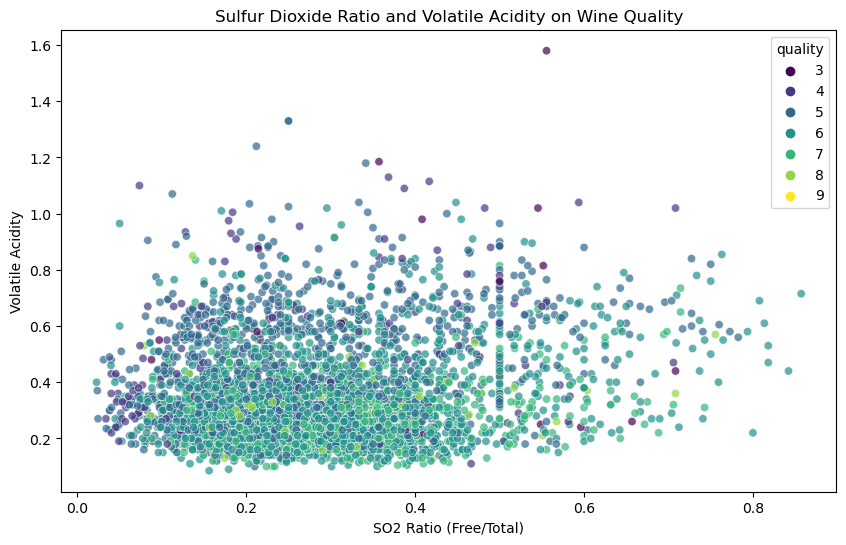

Correlations between SO2 Ratio, Volatile Acidity, and Quality:
                  SO2_ratio  volatile acidity   quality
SO2_ratio          1.000000          0.175159  0.123471
volatile acidity   0.175159          1.000000 -0.273879
quality            0.123471         -0.273879  1.000000
Regression Coefficients: SO2 Ratio = 1.2386, Volatile Acidity = -1.5766
Intercept: 5.9715


In [96]:
# YOUR CODE HERE

raw_df['SO2_ratio'] = raw_df['free sulfur dioxide'] / raw_df['total sulfur dioxide']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='SO2_ratio', y='volatile acidity', hue='quality', palette='viridis', alpha=0.7)
plt.title('Sulfur Dioxide Ratio and Volatile Acidity on Wine Quality')
plt.xlabel('SO2 Ratio (Free/Total)')
plt.ylabel('Volatile Acidity')
plt.show()


correlations = raw_df[['SO2_ratio', 'volatile acidity', 'quality']].corr()
print("Correlations between SO2 Ratio, Volatile Acidity, and Quality:")
print(correlations)

# Linear regression analysis
X = raw_df[['SO2_ratio', 'volatile acidity']]
y = raw_df['quality']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print(f"Regression Coefficients: SO2 Ratio = {coefficients[0]:.4f}, Volatile Acidity = {coefficients[1]:.4f}")
print(f"Intercept: {intercept:.4f}")

Dựa trên hệ số tương quan và biểu đồ phân tán:
* Phân tích mối quan hệ:
    * SO2 ratio vs Volatide Acidity: Mối quan hệ dương yếu giữa tỉ lệ SO2 và độ axit dễ bay hơi.
    * SO2 ratio và Chất lượng: Mối quan hệ âm yếu => tỉ lệ SO2 không phải là yếu tố quyết định chính ảnh hưởng đến chất lượng rượu.
    * Volatide Acid và Chất lượng: Mối quan hệ âm vừa phải => rượu vang có độ axit dễ bay hơi thấp thường có chất lượng cao hơn.

* Phân bố chất lượng dựa trên các yếu tố:
    * SO2 ratio: tương đối đồng đều giữa các mức chất lượng do mối quan hệ yếu. 
    * Volatide Acid: Không đồng đều giữa các mức chất lượng. Rượu vang có chất lượng thấp và trung bình có xu hướng có hàm lượng Volatide Acid cao hơn so với rượu vang chất lượng cao.

Dựa trên hệ số hồi quy: Hệ số hồi quy cho thấy rằng tỉ lệ SO2 có ảnh hưởng tích cực (mặc dù yếu) đến chất lượng rượu, trong khi độ axit dễ bay hơi có ảnh hưởng tiêu cực. Từ 2 yếu tố SO2 và Volatide Acid không thể nào quyết định được chất lượng rượu.

#### Task 26: Volatile Acidity and Alcohol on wine quality

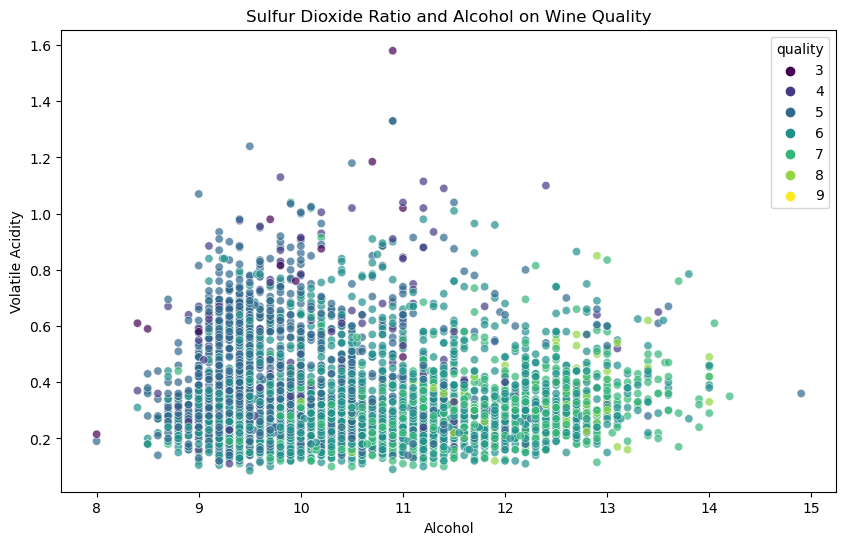

Correlations between Alcohol, Volatile Acidity, and Quality:
                   alcohol  volatile acidity   quality
alcohol           1.000000         -0.084157  0.471909
volatile acidity -0.084157          1.000000 -0.273879
quality           0.471909         -0.273879  1.000000
Regression Coefficients: Alcohol = 0.3421, Volatile Acidity = -1.2197
Intercept: 2.5779


In [97]:
# YOUR CODE HERE

plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='alcohol', y='volatile acidity', hue='quality', palette='viridis', alpha=0.7)
plt.title('Sulfur Dioxide Ratio and Alcohol on Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.show()


correlations = raw_df[['alcohol', 'volatile acidity', 'quality']].corr()
print("Correlations between Alcohol, Volatile Acidity, and Quality:")
print(correlations)

# Linear regression analysis
X = raw_df[['alcohol', 'volatile acidity']]
y = raw_df['quality']

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print(f"Regression Coefficients: Alcohol = {coefficients[0]:.4f}, Volatile Acidity = {coefficients[1]:.4f}")
print(f"Intercept: {intercept:.4f}")

Dựa trên hệ số tương quan và biểu đồ phân tán:
* Phân tích mối quan hệ:
    * Nồng độ cồn vs Volatide Acidity: Mối quan hệ âm yếu giữa nồng đồ cồn và độ axit dễ bay hơi.
    * Nồng độ cồn và Chất lượng: Mối quan hệ dương => rượu vang có nồng độ cồn cao hơn có xu hướng có chất lượng cao hơn. 
    * Volatide Acid và Chất lượng: Mối quan hệ âm vừa phải => rượu vang có độ axit dễ bay hơi thấp thường có chất lượng cao hơn.

* Phân bố chất lượng dựa trên các yếu tố:
    * Alcohol: Không đồng đều giữa các mức chất lượng. Rượu vang có chất lượng thấp và trung bình có xu hướng có nồng độ cồn thấp hơn so với rượu vang chất lượng cao. Tuy nhiên mqh này không tuyến tính.
    * Volatide Acid: Không đồng đều giữa các mức chất lượng. Rượu vang có chất lượng thấp và trung bình có xu hướng có hàm lượng Volatide Acid cao hơn so với rượu vang chất lượng cao.

Dựa trên hệ số hồi quy: Hệ số hồi quy cho thấy rằng nồng độ cồn có ảnh hưởng tích cực đến chất lượng rượu, trong khi độ axit dễ bay hơi có ảnh hưởng tiêu cực. Từ 2 yếu tố SO2 và Volatide Acid không thể nào quyết định được chất lượng rượu.

### Main Factors Influencing Wine Quality

Based on the above analysis, you should decide what factors affect wine quality.

In [98]:
# YOUR CODE HERE
best_corr = raw_df.corr().loc['quality'].sort_values(ascending=False)

print("Top 5 features that have the highest correlation with quality:")
print(best_corr[1:6])
print("\nTop 5 features that have the lowest correlation with quality:")
print(best_corr[-5:])

Top 5 features that have the highest correlation with quality:
alcohol                0.471909
SO2_ratio              0.123471
citric acid            0.112920
free sulfur dioxide    0.054578
pH                     0.047403
Name: quality, dtype: float64

Top 5 features that have the lowest correlation with quality:
residual sugar     -0.057808
fixed acidity      -0.083834
chlorides          -0.201755
volatile acidity   -0.273879
density            -0.330450
Name: quality, dtype: float64


Dựa trên hệ số tương quan, ta nhận thấy các yếu tố có ảnh hưởng đến chất lượng rượu là:
* Nồng đồ cồn: tương quan dương mạnh
* Mật độ: tương quan âm mạnh
* Volatide acid: tương quan âm
* Chlorides: tương quan âm
* Tỉ lệ SO2: tương quan dương
